In [17]:
R.version

               _                           
platform       x86_64-apple-darwin17.0     
arch           x86_64                      
os             darwin17.0                  
system         x86_64, darwin17.0          
status                                     
major          4                           
minor          0.5                         
year           2021                        
month          03                          
day            31                          
svn rev        80133                       
language       R                           
version.string R version 4.0.5 (2021-03-31)
nickname       Shake and Throw             

In [18]:
library(qiime2R)
library(tidyr)
library(tibble)
library(ggplot2)
library(vegan)
library(microbiome)
library(phyloseq)
library(dplyr)
library(ggpattern)

In [19]:
#rm(, large_list, large_vector, temp_variables)

In [28]:
# Read in the 16S qza files and clean them up for phyloseq
ASVtable_16S <- read_qza("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/QiimeOutPut/2022_Process/tableV_BacArc_99_SCTLD.qza")
ASVtable_16S <- ASVtable_16S$data # Extract the count data from list
ASVtaxa_16S <- read_qza("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/QiimeOutPut/2022_Process/taxaVsearch_rep-seqs-dn-99_SCTLD.qza")
taxtable_16S <- ASVtaxa_16S$data %>% as_tibble() %>% separate(Taxon, sep=";",
c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species")) 
# Convert taxonomy info to data frame with correct taxonomy labels
taxtable_16S <- taxtable_16S[-1,]
#asv_tab$asv_id <- rownames(asv_tab) # add a new column for ids




Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 70468 rows [2, 7, 11, 13, 15, 17, 21, 23, 27, 29, 34, 38, 39, 41, 43, 46, 47, 50, 54, 56, ...].”


In [29]:
sample_info_tab_16S <- read.csv("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/metadata_for_qiime/SCTLD_meta_analysis_metadata.csv", header = T, row.names = 1,
na.strings = c("", "NA"))

In [30]:
sample_info_tab_16S$sample_type <- factor(sample_info_tab_16S$sample_type, 
    levels = c("Seawater", "Mucus", "TissueSlurry", "TissueSlurry_Skeleton", "Sediment"))

sample_info_tab_16S$tissue_type <- factor(sample_info_tab_16S$tissue_type, 
    levels = c("AH", "DU", "DL"))

In [31]:
physeq_16S <- phyloseq(otu_table(ASVtable_16S, taxa_are_rows= T),
tax_table(as.data.frame(taxtable_16S) %>% column_to_rownames("Feature.ID") %>%
as.matrix()), sample_data(sample_info_tab_16S))
physeq_16S
#taxa_names(physeq_16S) <- paste0("ASV", seq(ntaxa(physeq_16S)))

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 119456 taxa and 2425 samples ]
sample_data() Sample Data:       [ 2425 samples by 63 sample variables ]
tax_table()   Taxonomy Table:    [ 119456 taxa by 8 taxonomic ranks ]

In [32]:

#ps_CS1 = filter_taxa(ps_CS1, function(x) sum(x > 1) > (0.001*length(x)), TRUE)




ps.coral =subset_samples(physeq_16S, sample_type == "TissueSlurry" | sample_type == "Mucus" | sample_type == "TissueSlurry_Skeleton" |
                        Alias !="AcroporaDisease")

ps.coral_TL =subset_samples(physeq_16S, sample_type == "TissueSlurry" | sample_type == "Mucus" | sample_type == "TissueSlurry_Skeleton")

ps.coral


ps.coral.TS =subset_samples(physeq_16S, sample_type == "TissueSlurry")
ps.coral.TS

ps.coral.TSS =subset_samples(physeq_16S, sample_type == "TissueSlurry_Skeleton")
ps.coral.TSS


ps.coral.M = subset_samples(physeq_16S, sample_type == "Mucus")
ps.coral.M

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 119456 taxa and 2424 samples ]
sample_data() Sample Data:       [ 2424 samples by 63 sample variables ]
tax_table()   Taxonomy Table:    [ 119456 taxa by 8 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 119456 taxa and 1585 samples ]
sample_data() Sample Data:       [ 1585 samples by 63 sample variables ]
tax_table()   Taxonomy Table:    [ 119456 taxa by 8 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 119456 taxa and 53 samples ]
sample_data() Sample Data:       [ 53 samples by 63 sample variables ]
tax_table()   Taxonomy Table:    [ 119456 taxa by 8 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 119456 taxa and 393 samples ]
sample_data() Sample Data:       [ 393 samples by 63 sample variables ]
tax_table()   Taxonomy Table:    [ 119456 taxa by 8 taxonomic ranks ]

In [33]:
sub_samples = c("TissueSlurry", "Mucus", "TissueSlurry_Skeleton", "Seawater", "Sediment")

sub_samples2 = c("TissueSlurry", "Mucus", "TissueSlurry_Skeleton")

ps =subset_samples(physeq_16S, sample_type %in% sub_samples)
ps

ps = filter_taxa(ps, function(x) sum(x > 20) > (0.015*length(x)), TRUE)
ps
  
                 
ps.coral_TL =subset_samples(physeq_16S, sample_type %in% sub_samples2 & field_host_genus_id!="Acropora")
ps.coral_TL 
                 
ps.coral_TL_reef =subset_samples(ps.coral_TL, Biome=="Field" & field_host_genus_id!="Acropora")
ps.coral_TL_reef
                 
ps.coral_TL_meso =subset_samples(ps.coral_TL, Biome=="Aquaria")
ps.coral_TL_meso               
                 
                 
ps.coral_TL = filter_taxa(ps.coral_TL, function(x) sum(x > 20) > (0.015*length(x)), TRUE)
ps.coral_TL 
                          
                          
ps.coral_TL_reef = filter_taxa(ps.coral_TL_reef, function(x) sum(x > 20) > (0.015*length(x)), TRUE)
ps.coral_TL_reef
                          
ps.coral_TL_meso = filter_taxa(ps.coral_TL_meso, function(x) sum(x > 20) > (0.015*length(x)), TRUE)
ps.coral_TL_meso                           

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 119456 taxa and 2362 samples ]
sample_data() Sample Data:       [ 2362 samples by 63 sample variables ]
tax_table()   Taxonomy Table:    [ 119456 taxa by 8 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2972 taxa and 2362 samples ]
sample_data() Sample Data:       [ 2362 samples by 63 sample variables ]
tax_table()   Taxonomy Table:    [ 2972 taxa by 8 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 119456 taxa and 1572 samples ]
sample_data() Sample Data:       [ 1572 samples by 63 sample variables ]
tax_table()   Taxonomy Table:    [ 119456 taxa by 8 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 119456 taxa and 898 samples ]
sample_data() Sample Data:       [ 898 samples by 63 sample variables ]
tax_table()   Taxonomy Table:    [ 119456 taxa by 8 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 119456 taxa and 674 samples ]
sample_data() Sample Data:       [ 674 samples by 63 sample variables ]
tax_table()   Taxonomy Table:    [ 119456 taxa by 8 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2030 taxa and 1572 samples ]
sample_data() Sample Data:       [ 1572 samples by 63 sample variables ]
tax_table()   Taxonomy Table:    [ 2030 taxa by 8 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1874 taxa and 898 samples ]
sample_data() Sample Data:       [ 898 samples by 63 sample variables ]
tax_table()   Taxonomy Table:    [ 1874 taxa by 8 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1794 taxa and 674 samples ]
sample_data() Sample Data:       [ 674 samples by 63 sample variables ]
tax_table()   Taxonomy Table:    [ 1794 taxa by 8 taxonomic ranks ]

In [34]:
sum_ps   <- ps  %>%
  tax_glom(taxrank = "Family") %>%
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()

Warning message:
“`as.tibble()` was deprecated in tibble 2.0.0.
Please use `as_tibble()` instead.
The signature and semantics have changed, see `?as_tibble`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


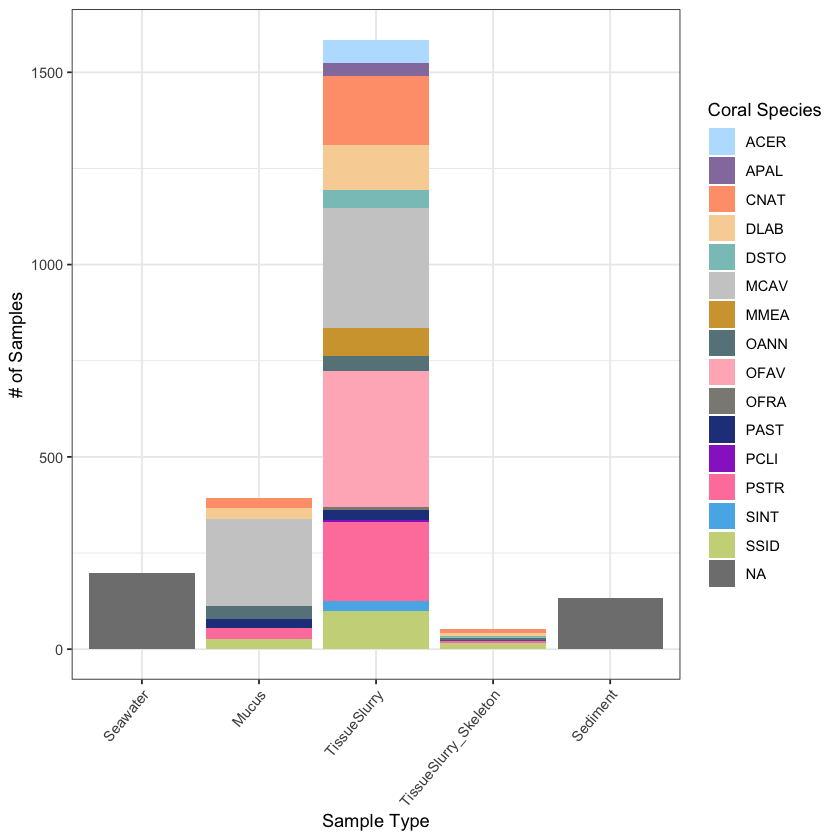

In [35]:
sample_data(ps) %>%
as.tibble  %>%

#dplyr::mutate_all(dplyr::funs(str_replace_all(.,"TissueSlurry", "Tissue Slurry"))) %>% 
#dplyr::mutate_all(dplyr::funs(str_replace_all(.,"Slurry_Skeleton", "Slurry+Skeleton"))) %>% 
ggplot(
       aes(x =sample_type)) + 
geom_bar(aes(fill=species_code)) +
scale_fill_manual(values=c("#bae1ff", "#957DAD", "lightsalmon",  
                           
                           "#F9D4A4", 
                            "#89C4C2",
                        
                           "gray80", 
                           "#D1A33D",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                            "gray80",
                           "#AD6F3B", "#673770")) +
#facet_grid(Treatment~Host_Species, scales="free") +
theme_bw() +
theme(axis.text.x = element_text(angle = 50, hjust = 1)) +
xlab("Sample Type") +
 labs(fill = "Coral Species") +
ylab("# of Samples") 



#ggsave("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/figs/num_sampletype.png",
 #       width = 5, height = 5.5, units = "in", dpi=250)

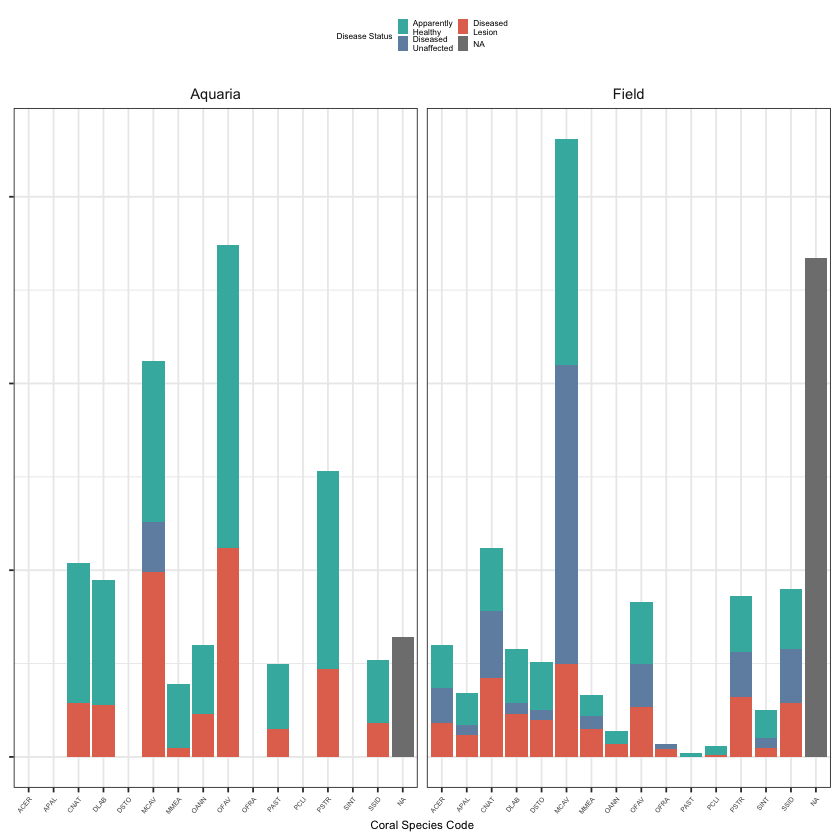

In [42]:
health_samples = sample_data(ps) %>%
as.tibble  %>%

#dplyr::mutate_all(dplyr::funs(str_replace_all(.,"TissueSlurry", "Tissue Slurry"))) %>% 
#dplyr::mutate_all(dplyr::funs(str_replace_all(.,"Slurry_Skeleton", "Slurry+Skeleton"))) %>% 
ggplot(
       aes(x =species_code)) + 
geom_bar(aes(fill=tissue_type)) +
scale_fill_manual(values=c("#40B5AD", "#6F8FAF", "#E3735E"),
                  labels=c(AH="Apparently\nHealthy",
                            DU="Diseased\nUnaffected", 
                            DL="Diseased\nLesion")) +
#facet_grid(Treatment~Host_Species, scales="free") +
theme_bw() +
guides(fill = guide_legend(keywidth = 0.5, keyheight =.50, nrow=2)) +
theme(axis.text.x = element_text(angle = 50, hjust = 1)) +
theme(legend.position="top") +
xlab("Coral Species Code") +
 labs(fill = "Disease Status") +
ylab("# of Samples") +
facet_wrap(~Biome) +
theme(axis.title.x = element_text(size = 7)) +
theme(axis.title.y = element_blank()) +
theme(axis.text.x = element_text(size =4)) +
#theme(strip.text.y = element_blank()) +
#theme(panel.border=element_blank(), axis.line=element_line()) +
theme(axis.text.y = element_blank()) +
theme(strip.background = element_blank()) +
theme(legend.text =element_text(size=5)) +
theme(legend.title = element_text(size=5)) 

health_samples

#ggsave("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/figs/num_ALias.png",
 #       width = 4, height = 4, units = "in", dpi=250)

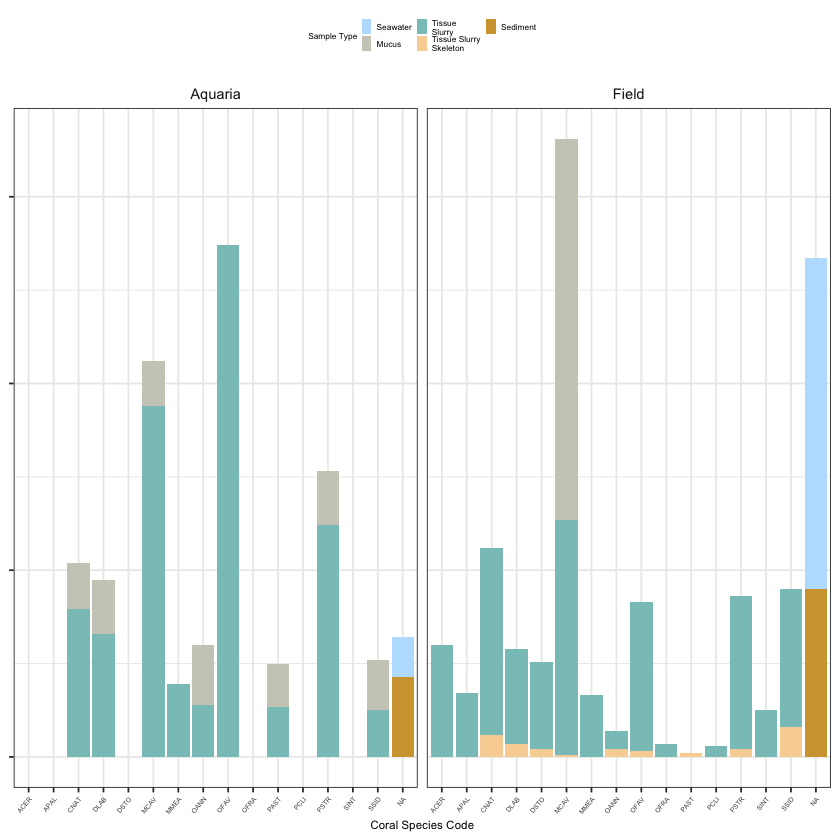

In [37]:
types_samples= sample_data(ps) %>%
as.tibble  %>%

#dplyr::mutate_all(dplyr::funs(str_replace_all(.,"TissueSlurry", "Tissue Slurry"))) %>% 
#dplyr::mutate_all(dplyr::funs(str_replace_all(.,"Slurry_Skeleton", "Slurry+Skeleton"))) %>% 
ggplot(
       aes(x =species_code)) + 
geom_bar(aes(fill=sample_type)) +
scale_fill_manual(values=c("#bae1ff","ivory3", "#89C4C2", "#F9D4A4" , "#D1A33D"),
                 label=c(TissueSlurry_Skeleton= "Tissue Slurry\nSkeleton",
                        TissueSlurry="Tissue\nSlurry")) +
#facet_grid(Treatment~Host_Species, scales="free") +
theme_bw() +
guides(fill = guide_legend(keywidth = 0.5, keyheight =.50, nrow=2)) +
theme(axis.text.x = element_text(angle = 50, hjust = 1)) +
theme(legend.position="top") +
xlab("Coral Species Code") +
 labs(fill = "Sample Type") +
ylab("# of Samples") +
facet_wrap(~Biome) +
theme(axis.title.x = element_text(size = 7)) +
theme(axis.title.y = element_blank()) +
theme(axis.text.y = element_blank()) +
theme(axis.text.x = element_text(size =4)) +
#theme(strip.text.y = element_blank()) +
#theme(panel.border=element_blank(), axis.line=element_line()) +
theme(strip.background = element_blank()) +
theme(legend.text =element_text(size=5)) +
theme(legend.title = element_text(size=5)) 
types_samples

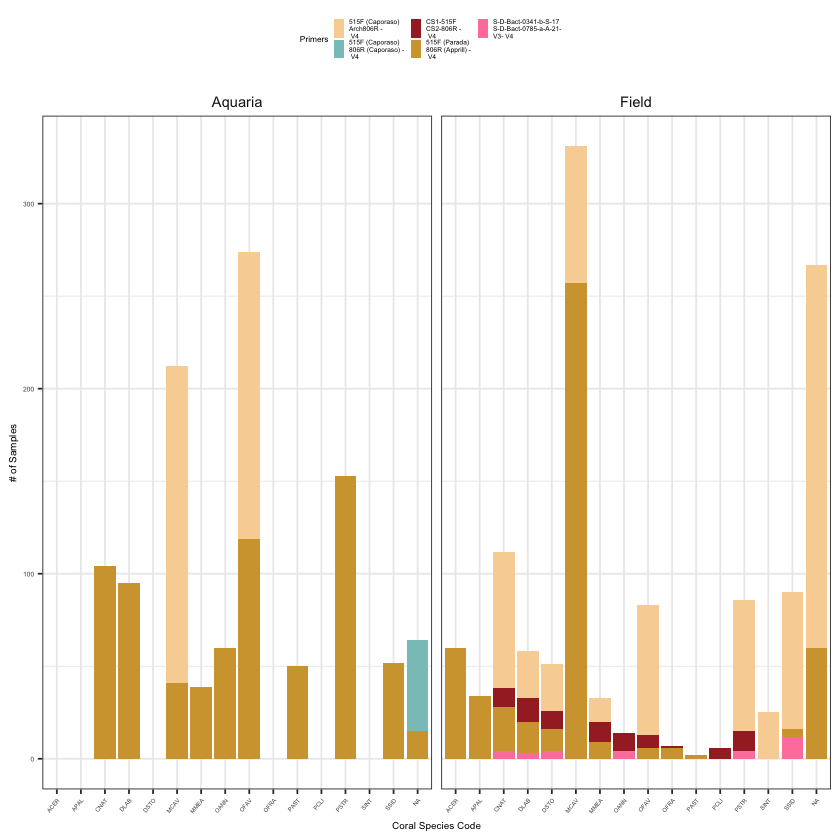

In [38]:
primer_samples = sample_data(ps) %>%
as.tibble  %>%

#dplyr::mutate_all(dplyr::funs(str_replace_all(.,"TissueSlurry", "Tissue Slurry"))) %>% 
#dplyr::mutate_all(dplyr::funs(str_replace_all(.,"Slurry_Skeleton", "Slurry+Skeleton"))) %>% 
ggplot(
       aes(x =species_code)) + 
geom_bar(aes(fill=primer_names)) +
#facet_grid(Treatment~Host_Species, scales="free") +
theme_bw() +
theme(axis.text.x = element_text(angle = 50, hjust = 1)) +
xlab("Coral Species Code") +
 labs(fill = "Primers") +
ylab("# of Samples") +
facet_wrap(~Biome) +
theme(axis.title.x = element_text(size = 6)) +
theme(axis.title.y = element_text(size = 6)) +
theme(axis.text.x = element_text(size =3.5)) +
theme(axis.text.y = element_text(size =4)) +
#theme(strip.text.y = element_blank()) +
guides(fill = guide_legend(keywidth = 0.5, keyheight =.50, nrow=2)) +
theme(legend.position="top") +
#theme(panel.border=element_blank(), axis.line=element_line()) +
theme(strip.background = element_blank()) +
theme(legend.text =element_text(size=4)) +
theme(legend.title = element_text(size=5)) +
scale_fill_manual(values=c("#F9D4A4", 
                            "#89C4C2",
                           "brown", 
                           "#D1A33D",
                            "palevioletred1",
                           "lightblue4"),
                  
                  labels=c(CS1_515F_CS2_806R="CS1-515F\nCS2-806R -\n V4",
                         Pr515_806RAp="515F (Parada)\n806R (Apprill) -\n V4",
                         S_D_Bact_0341_b_S_17_S_D_Bact_0785_a_A_21="S-D-Bact-0341-b-S-17\nS-D-Bact-0785-a-A-21-\nV3- V4",
                        Caporaso515F_806RCaporaso="515F (Caporaso)\n806R (Caporaso) -\n V4",
                          AA515F_archaea806R="515F (Caporaso)\nArch806R -\n V4")) 


primer_samples

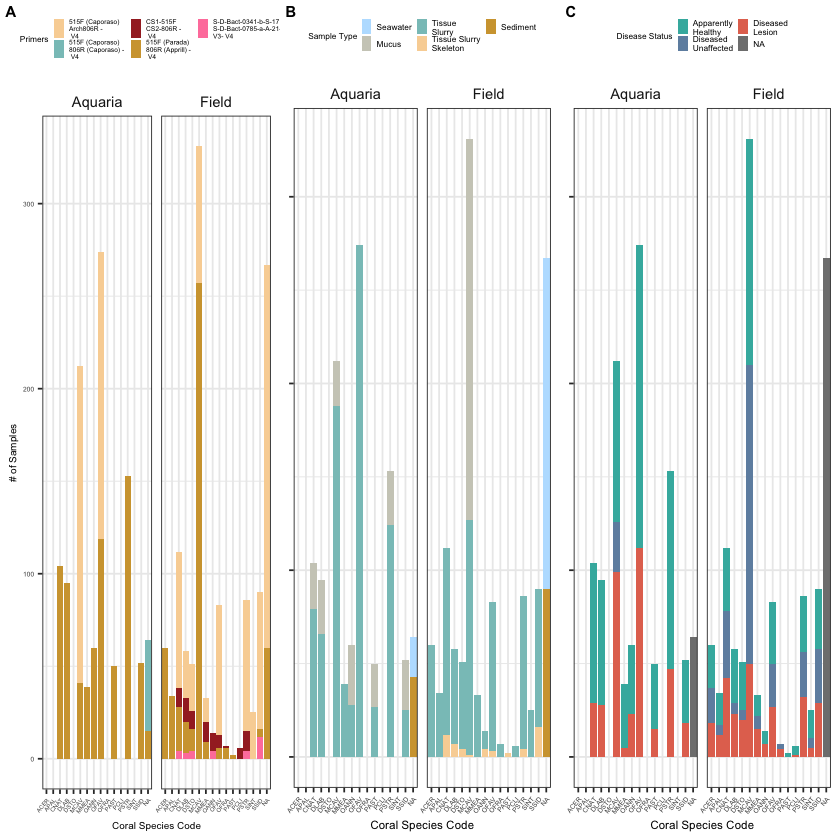

In [43]:
ggpubr::ggarrange(primer_samples, types_samples, health_samples, labels = c("A", "B", "C"),
                 font.label = list(size = 9, color = "black"), nrow=1)
ggsave("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/figs/samples_num.png",
     width = 7.5, height = 4, units = "in", dpi=300)

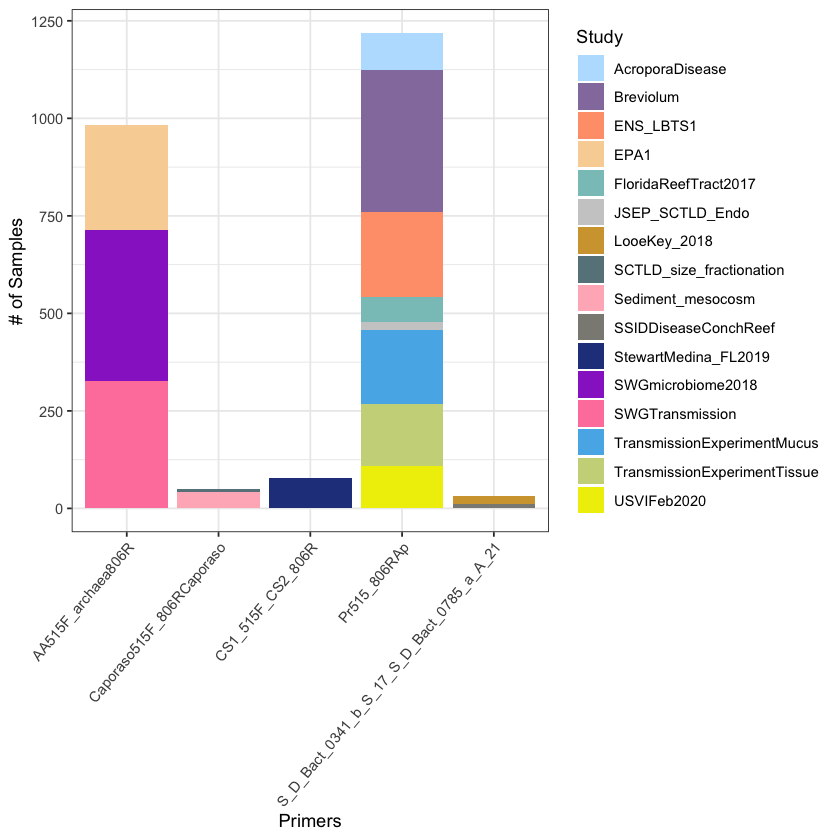

In [36]:
sample_data(ps) %>%
as.tibble  %>%

#dplyr::mutate_all(dplyr::funs(str_replace_all(.,"TissueSlurry", "Tissue Slurry"))) %>% 
#dplyr::mutate_all(dplyr::funs(str_replace_all(.,"Slurry_Skeleton", "Slurry+Skeleton"))) %>% 
ggplot(
       aes(x =primer_names)) + 
geom_bar(aes(fill=Alias)) +
scale_fill_manual(values=c("#bae1ff", "#957DAD", "lightsalmon",  
                           
                           "#F9D4A4", 
                            "#89C4C2",
                        
                           "gray80", 
                           "#D1A33D",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                            "gray80",
                           "#AD6F3B", "#673770")) +
#facet_grid(Treatment~Host_Species, scales="free") +
theme_bw() +
theme(axis.text.x = element_text(angle = 50, hjust = 1)) +
xlab("Primers") +
 labs(fill = "Study") +
ylab("# of Samples")

ggsave("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/figs/num_primers.png",
        width = 6, height = 7, units = "in", dpi=250)

In [77]:
ps_clr <- microbiome::transform(ps, 'clr')
ps.coral_TL_CLR <- microbiome::transform(ps.coral_TL, 'clr')
ps.coral_TL_reef_CLR <- microbiome::transform(ps.coral_TL_reef, 'clr')
ps.coral_TL_meso_CLR <- microbiome::transform(ps.coral_TL_meso, 'clr')

In [78]:
ps.coral_TL_meso_ord <- ordinate(ps.coral_TL_meso_CLR, "RDA", "euclidean")

ps.coral_TL_reef_ord <- ordinate(ps.coral_TL_reef_CLR, "RDA", "euclidean")
ps.coral_TL_ord <- ordinate(ps.coral_TL_CLR, "RDA", "euclidean")

In [103]:
sample_data(ps.coral_TL_CLR) %>%
view

In [54]:
ps_clr

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2972 taxa and 2362 samples ]
sample_data() Sample Data:       [ 2362 samples by 60 sample variables ]
tax_table()   Taxonomy Table:    [ 2972 taxa by 8 taxonomic ranks ]

In [55]:
psr_clr.ord <- ordinate(ps_clr, "RDA", "euclidean")

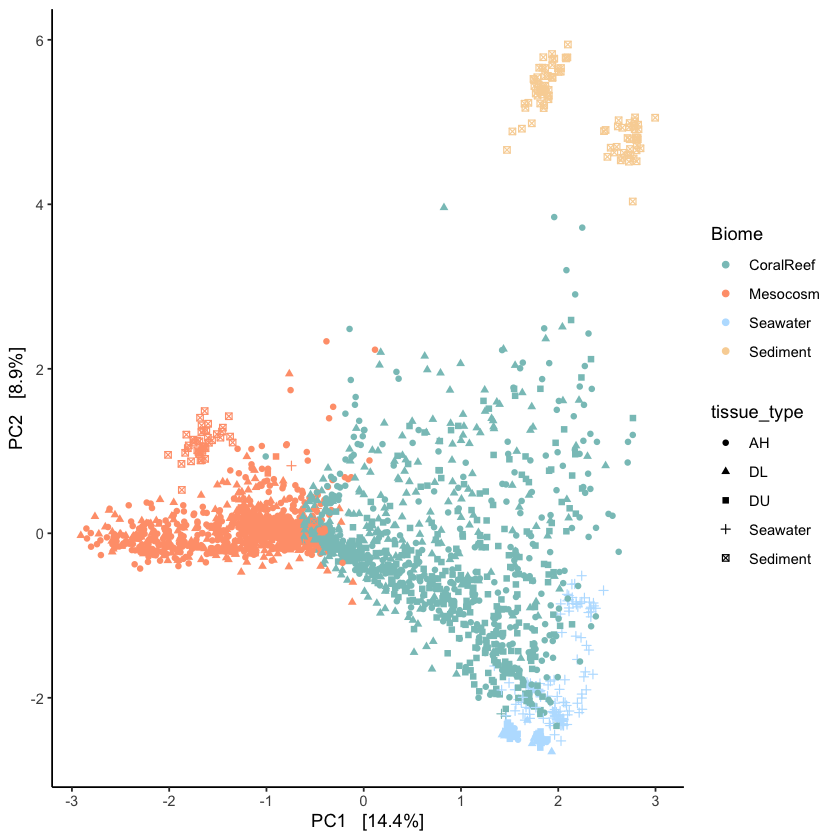

In [56]:
 plot_ordination(ps_clr, psr_clr.ord,
                               color="Biome",
                               shape="tissue_type",
                               axes = c(1,2)) +
theme_classic() +
scale_color_manual(values=c("#89C4C2", "lightsalmon", "#bae1ff", 
                           
                           "#F9D4A4")) 



#stat_ellipse()

ggsave("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/figs/Ord_biome.png",
      width = 5, height = 5, units = "in", dpi=250)

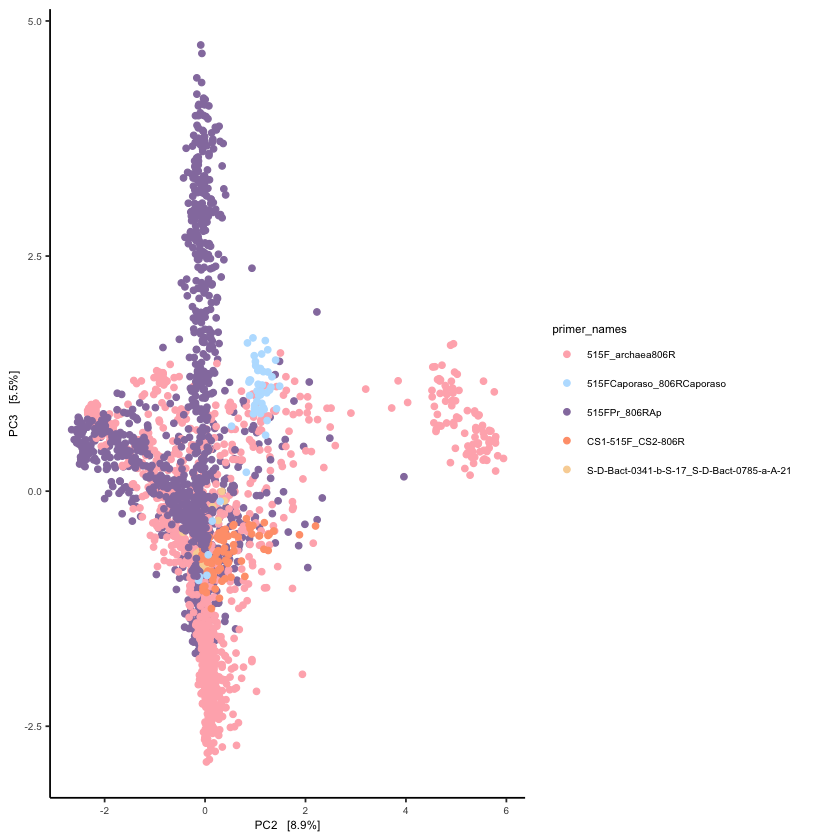

In [65]:
plot_ordination(ps_clr, psr_clr.ord,
                               color="primer_names",
                               axes = c(2,3)) +

theme_classic() +
scale_color_manual(values=c("#ffb3ba", "#bae1ff", "#957DAD", "lightsalmon",  
                           
                           "#F9D4A4", 
                            "#89C4C2",
                        
                           "gray80", 
                           "#D1A33D",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                            "gray80",
                           "#AD6F3B", "#673770")) +
theme(legend.text =element_text(size=6),
     legend.title=element_text(size=7)) +
theme(axis.title.x = element_text(size = 7)) +
theme(axis.title.y = element_text(size = 7)) +
theme(axis.text.x = element_text(size =6)) +
theme(axis.text.y = element_text(size =6)) 

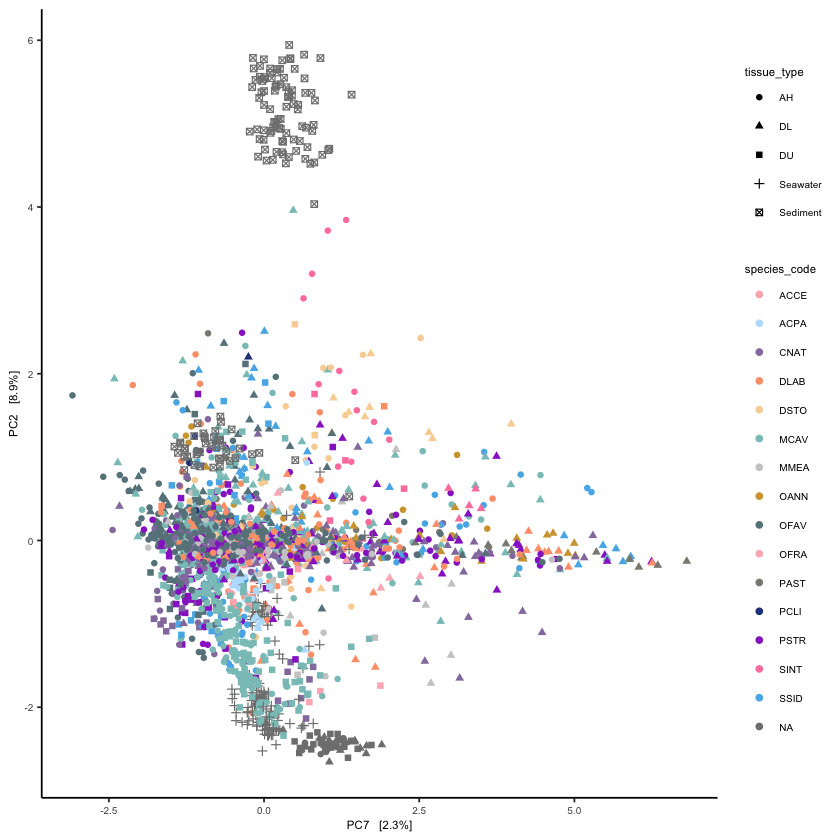

In [70]:
 plot_ordination(ps_clr, psr_clr.ord,
                               color="species_code",
                              shape="tissue_type", axes = c(7,2)) +
theme_classic() +
scale_color_manual(values=c("#ffb3ba", "#bae1ff", "#957DAD", "lightsalmon",  
                           
                           "#F9D4A4", 
                            "#89C4C2",
                        
                           "gray80", 
                           "#D1A33D",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                            "gray80",
                           "#AD6F3B", "#673770")) +
theme(legend.text =element_text(size=6),
     legend.title=element_text(size=7)) +
theme(axis.title.x = element_text(size = 7)) +
theme(axis.title.y = element_text(size = 7)) +
theme(axis.text.x = element_text(size =6)) +
theme(axis.text.y = element_text(size =6)) 

In [59]:
ps_clr_coral <- microbiome::transform(ps.coral_TL, 'clr')

In [60]:
psr_clr.ord_coral <- ordinate(ps_clr_coral, "RDA", "euclidean")

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 9. Consider
specifying shapes manually if you must have them.”


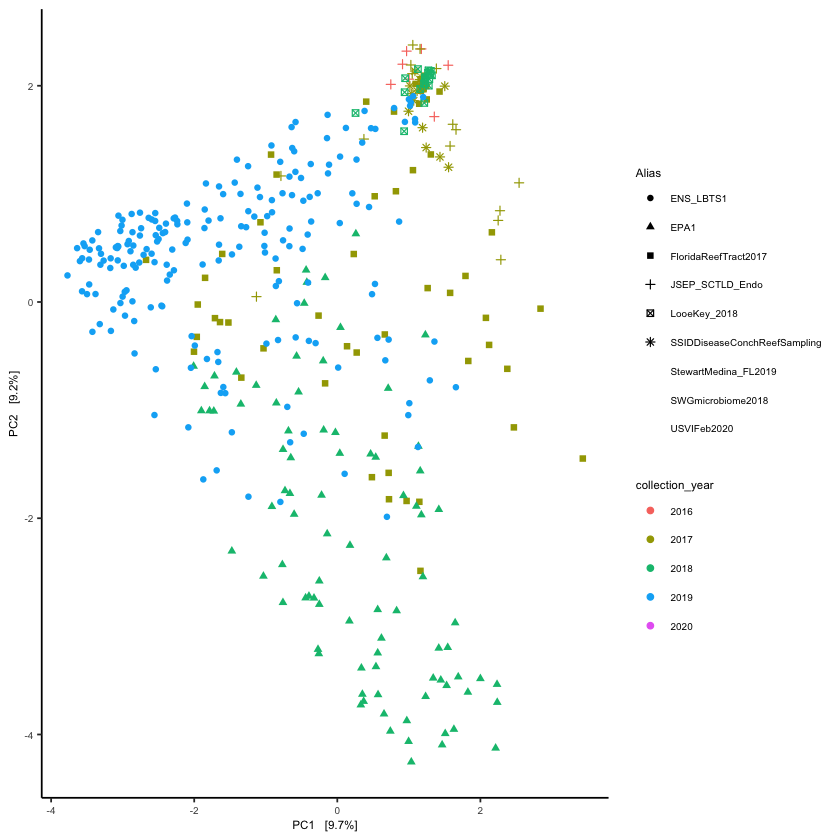

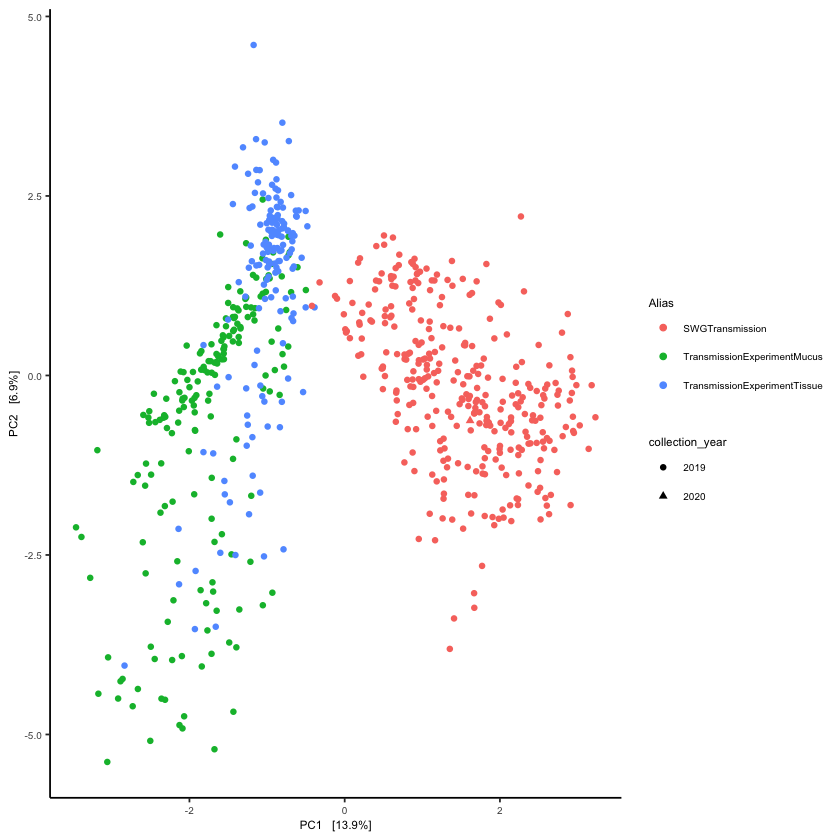

In [63]:
plot_ordination(ps.coral_TL_reef_CLR, ps.coral_TL_reef_ord,
                               color="collection_year", shape="Alias",
                               axes = c(1,2)) +
theme_classic() +
theme(legend.text =element_text(size=6),
     legend.title=element_text(size=7)) +
theme(axis.title.x = element_text(size = 7)) +
theme(axis.title.y = element_text(size = 7)) +
theme(axis.text.x = element_text(size =6)) +
theme(axis.text.y = element_text(size =6)) #+
#stat_ellipse()


plot_ordination(ps.coral_TL_meso_CLR, ps.coral_TL_meso_ord,
                               color="Alias", shape="collection_year",
                               axes = c(1,2)) +
theme_classic() +
theme(legend.text =element_text(size=6),
     legend.title=element_text(size=7)) +
theme(axis.title.x = element_text(size = 7)) +
theme(axis.title.y = element_text(size = 7)) +
theme(axis.text.x = element_text(size =6)) +
theme(axis.text.y = element_text(size =6)) #+
#stat_ellipse()

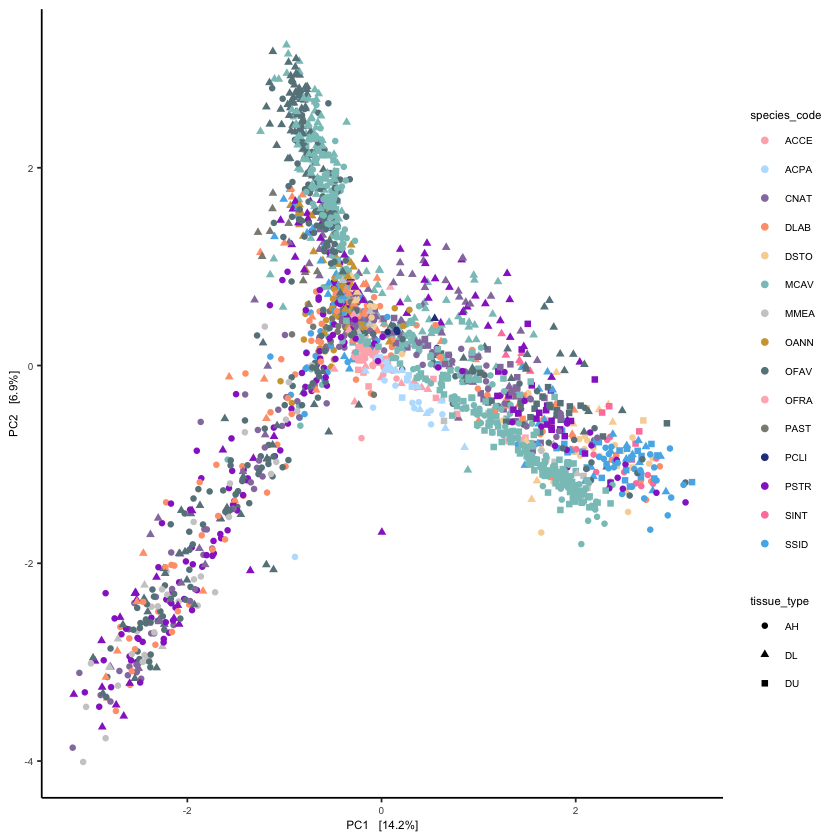

In [74]:
plot_ordination(ps_clr_coral, psr_clr.ord_coral,
                               color="species_code", shape="tissue_type",
                               axes = c(1,2)) +
theme_classic() +
theme(legend.text =element_text(size=6),
     legend.title=element_text(size=7)) +
theme(axis.title.x = element_text(size = 7)) +
theme(axis.title.y = element_text(size = 7)) +
theme(axis.text.x = element_text(size =6)) +
theme(axis.text.y = element_text(size =6)) +

scale_color_manual(values=c("#ffb3ba", "#bae1ff", "#957DAD", "lightsalmon",  
                           
                           "#F9D4A4", 
                            "#89C4C2",
                        
                           "gray80", 
                           "#D1A33D",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                            "gray80",
                           "#AD6F3B", "#673770"))

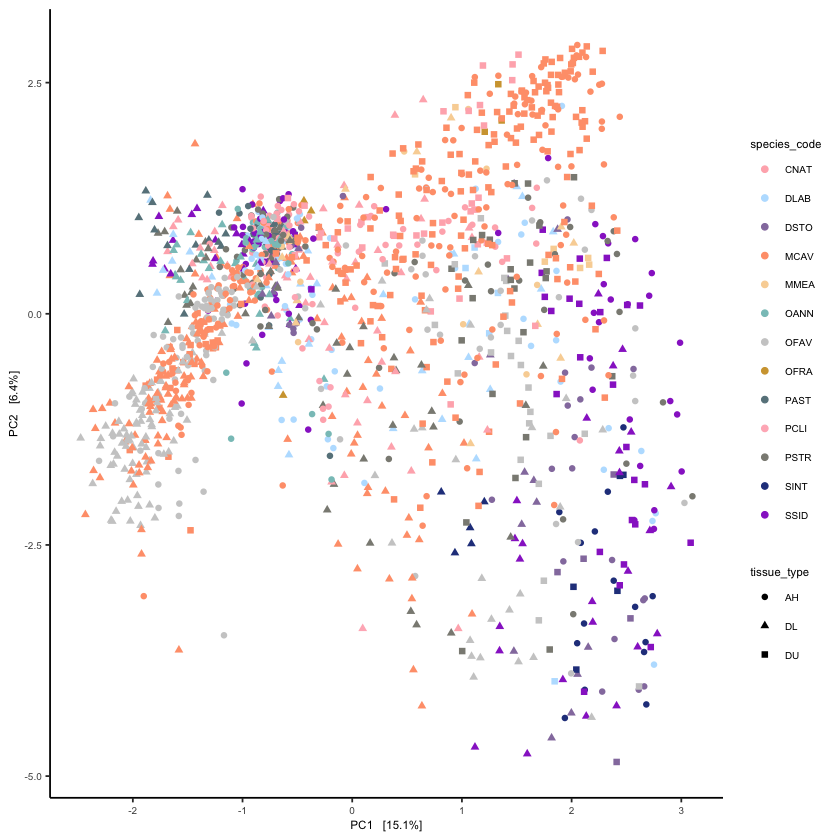

In [81]:
plot_ordination(ps.coral_TL_CLR, ps.coral_TL_ord,
                               color="species_code", shape="tissue_type",
                               axes = c(1,2)) +
theme_classic() +
theme(legend.text =element_text(size=6),
     legend.title=element_text(size=7)) +
theme(axis.title.x = element_text(size = 7)) +
theme(axis.title.y = element_text(size = 7)) +
theme(axis.text.x = element_text(size =6)) +
theme(axis.text.y = element_text(size =6)) +

scale_color_manual(values=c("#ffb3ba", "#bae1ff", "#957DAD", "lightsalmon",  
                           
                           "#F9D4A4", 
                            "#89C4C2",
                        
                           "gray80", 
                           "#D1A33D",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                            "gray80",
                           "#AD6F3B", "#673770"))

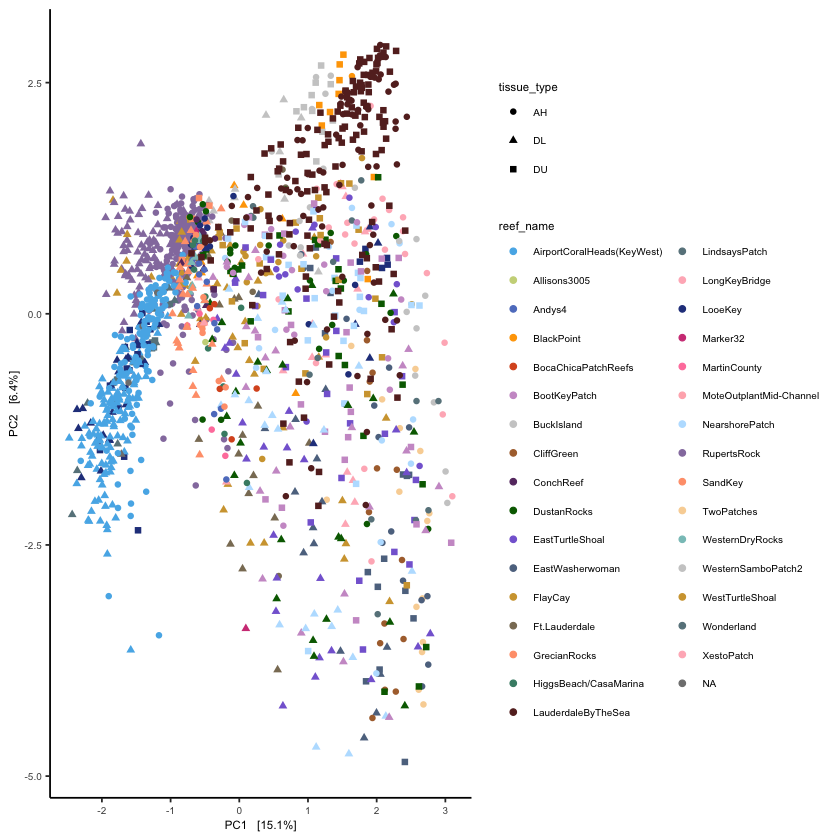

In [91]:
plot_ordination(ps.coral_TL_CLR, ps.coral_TL_ord,
                               color="reef_name", shape="tissue_type",
                               axes = c(1,2)) +
theme_classic() +
theme(legend.text =element_text(size=6),
     legend.title=element_text(size=7)) +
theme(axis.title.x = element_text(size = 7)) +
theme(axis.title.y = element_text(size = 7)) +
theme(axis.text.x = element_text(size =6)) +
theme(axis.text.y = element_text(size =6)) +
scale_color_manual(values=c("#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#006700","#8569D5", 
                           "#5E738F","#D1A33D", "#8A7C64","lightsalmon","aquamarine4", "#652926",
                           "lightblue4", "lightpink","royalblue4","#D14285",
                           "palevioletred1", "#ffb3ba", "#bae1ff", "#957DAD", "lightsalmon",  
                           
                           "#F9D4A4", 
                            "#89C4C2",
                        
                           "gray80", 
                           "#D1A33D",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                            "gray80",
                           "#AD6F3B", "#673770"))

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 12. Consider
specifying shapes manually if you must have them.”


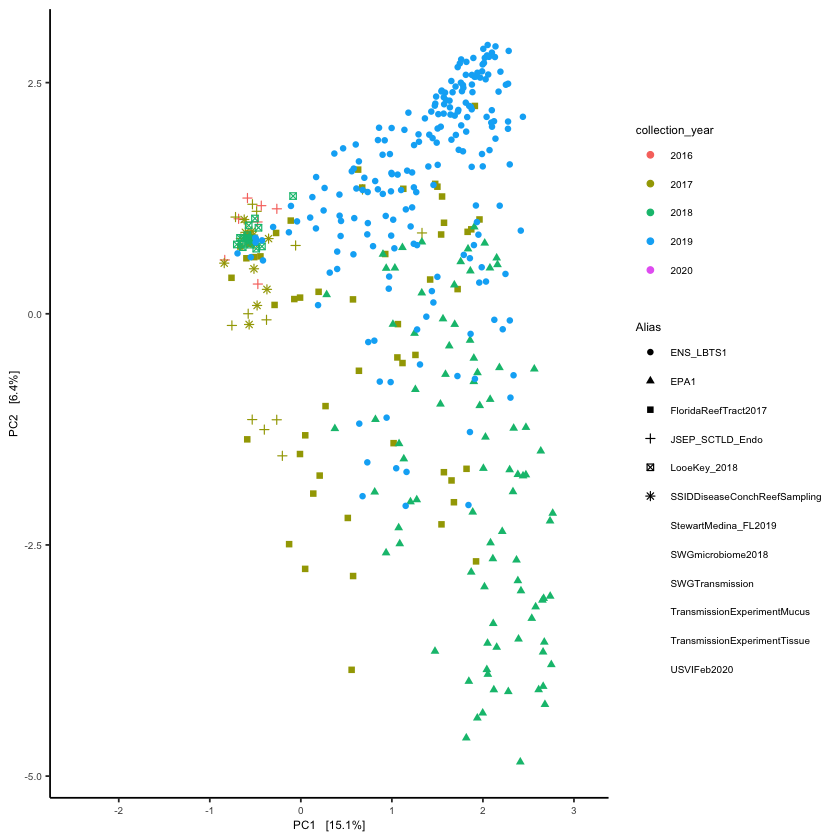

In [95]:
plot_ordination(ps.coral_TL_CLR, ps.coral_TL_ord,
                               color="collection_year", shape="Alias",
                               axes = c(1,2)) +
theme_classic() +
theme(legend.text =element_text(size=6),
     legend.title=element_text(size=7)) +
theme(axis.title.x = element_text(size = 7)) +
theme(axis.title.y = element_text(size = 7)) +
theme(axis.text.x = element_text(size =6)) +
theme(axis.text.y = element_text(size =6))

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 9. Consider
specifying shapes manually if you must have them.”


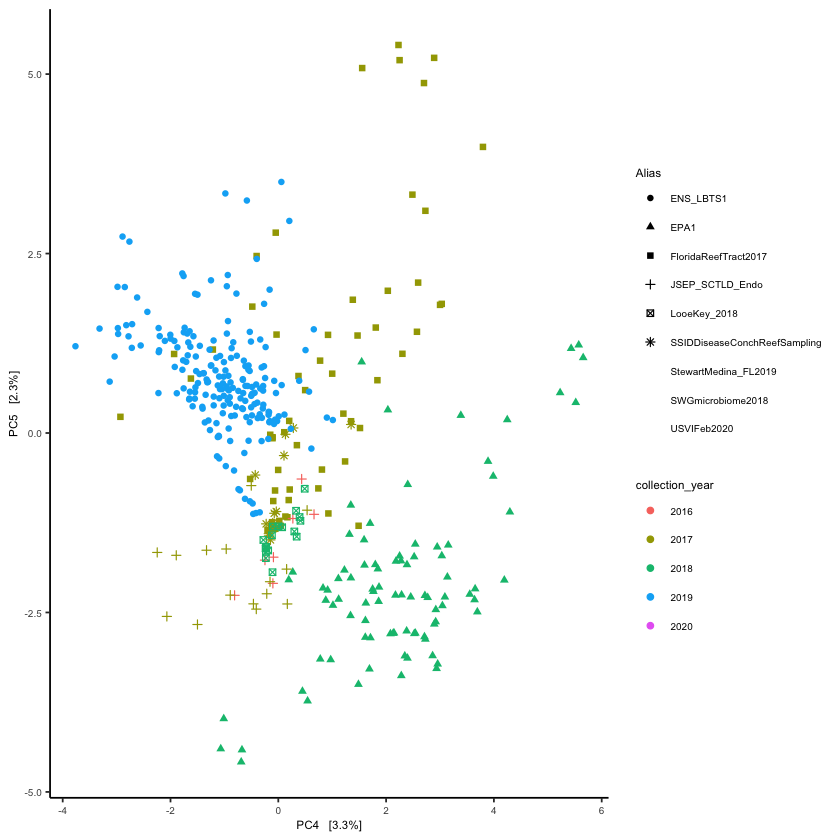

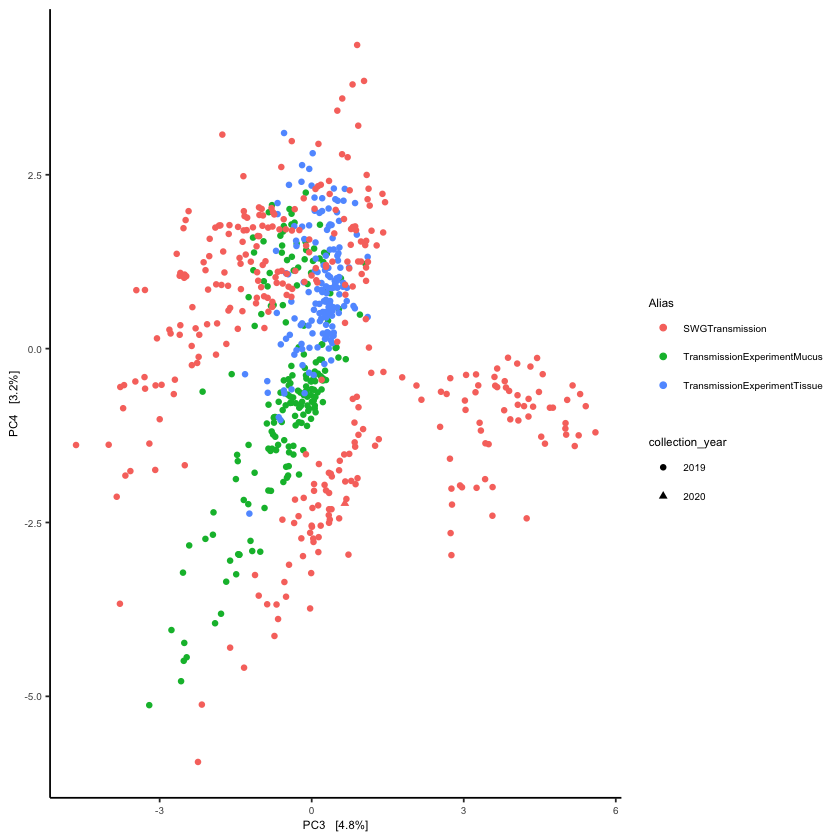

In [66]:
plot_ordination(ps.coral_TL_reef_CLR, ps.coral_TL_reef_ord,
                               color="collection_year", shape="Alias",
                               axes = c(4,5)) +
theme_classic() +
theme(legend.text =element_text(size=6),
     legend.title=element_text(size=7)) +
theme(axis.title.x = element_text(size = 7)) +
theme(axis.title.y = element_text(size = 7)) +
theme(axis.text.x = element_text(size =6)) +
theme(axis.text.y = element_text(size =6)) #+
#stat_ellipse()


plot_ordination(ps.coral_TL_meso_CLR, ps.coral_TL_meso_ord,
                               color="Alias", shape="collection_year",
                               axes = c(3,4)) +
theme_classic() +
theme(legend.text =element_text(size=6),
     legend.title=element_text(size=7)) +
theme(axis.title.x = element_text(size = 7)) +
theme(axis.title.y = element_text(size = 7)) +
theme(axis.text.x = element_text(size =6)) +
theme(axis.text.y = element_text(size =6)) #+
#stat_ellipse()

In [67]:


plot_ordination(ps_clr_, psr_clr.ord_coral,
                               color="collection_year",
                               axes = c(1,2), shape="Biome") +
theme_classic() +
theme(legend.text =element_text(size=6),
     legend.title=element_text(size=7)) +
theme(axis.title.x = element_text(size = 7)) +
theme(axis.title.y = element_text(size = 7)) +
theme(axis.text.x = element_text(size =6)) +
theme(axis.text.y = element_text(size =6))

ERROR: Error in plot_ordination(ps_clr_, psr_clr.ord_coral, color = "collection_year", : object 'ps_clr_' not found


In [24]:
#What explains the most variation

#ps_clr_df=as.data.frame(otu_table(t(ps_clr_coral)))
#ps_clr_meta= as(sample_data(ps_clr_coral), "data.frame")

#adonis(ps_clr_df~tissue_type + collection_year + reef_name + sample_type + species_code + 
 #      Alias + primer_names + dna_extraction_method + Lab, 
  #     data= ps_clr_meta, permutations = 999,
   #      method = "euclidean") 
#Timepoits has the biggest effect so 

In [ ]:
ps_clr_df=as.data.frame(otu_table(ps_clr_coral))
ps_clr_meta= as(sample_data(ps_clr_coral), "data.frame")

envfit(ps_clr_df ~ tissue_type + collection_year + reef_name + sample_type + species_code + 
       Alias + primer_names + dna_extraction_method + Lab, data = ps_clr_meta, na.rm = TRUE)

In [ ]:
plot_ordination(ps_clr, psr_clr.ord,
                               color="Alias",
                              shape="pimers_names", axes = c(1,2))


plot_ordination(ps_clr, psr_clr.ord,
                               color="sample_type",
                              shape="pimers_names", axes = c(1,2))




plot_ordination(ps_clr, psr_clr.ord,
                               color="tissue_type",
                              shape="pimers_names", axes = c(1,2))


plot_ordination(ps_clr, psr_clr.ord,
                                   color="tissue_type",
                              shape="pimers_names", axes = c(2,3))


plot_ordination(ps_clr, psr_clr.ord,
                                  color="tissue_type",
                              shape="pimers_names", axes = c(3,4))

plot_ordination(ps_clr, psr_clr.ord,
                                 color="Lab",
                              shape="pimers_names", axes = c(1,2)) +
scale_fill_manual(values=c("#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F","#D1A33D", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                           "#CD9BCD", "gray80",
                           "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", "#5E738F",
                          "#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD")) 

In [ ]:
ps.mock <- subset_samples(physeq_16S, sample_type == "Mock")
ps.mock

In [ ]:
ps.mock <- subset_samples(physeq_16S, sample_type == "Mock")
ps.mock

sum_ps.mock   <- ps.mock  %>%
  tax_glom(taxrank = "Genus") %>%                     # agglomerate at order level
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()    

In [ ]:

ggplot(subset(sum_ps.mock, Abundance >0.01 ), 
       aes(x =Collection_ID, y=Abundance, fill=Genus)) + 
geom_bar(stat="identity", position="fill") +
scale_fill_manual(values=c("#56B4E9", "lightsalmon","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F","#D1A33D", "#8A7C64","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                           "#CD9BCD", "gray80",
                           "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", "#5E738F",
                          "#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD", "blue", "red")) +
guides(fill = guide_legend(keywidth = 0.3, , keyheight =.70, ncol=1)) +
theme(axis.text.x = element_text(angle = 90, hjust = 1))

In [ ]:
ps.cntrl <- subset_samples(physeq_16S, sample_type == "Control")
ps.cntrl

sum_ps.cntrl   <- ps.cntrl  %>%
  tax_glom(taxrank = "Order") %>%                     # agglomerate at order level
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()    

In [ ]:
ggplot(subset(sum_ps.cntrl, Abundance >0.075 ), 
       aes(x =Collection_ID, y=Abundance, fill=Order)) + 
geom_bar(stat="identity", position="fill") +
facet_grid(.~Lab, scales = "free") +
scale_fill_manual(values=c("#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F","#D1A33D", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                           "#CD9BCD", "gray80",
                           "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", "#5E738F",
                          "#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD", "blue", "red")) +
guides(fill = guide_legend(keywidth = 0.3, , keyheight =.70, ncol=1)) +
theme(axis.text.x = element_text(angle = 90, hjust = 1))

In [ ]:
ps.coral =subset_samples(physeq_16S, sample_type == "TissueSlurry" | sample_type == "Mucus" | sample_type == "TissueSlurry_Skeleton")

ps.coral


ps.coral.TS =subset_samples(physeq_16S, sample_type == "TissueSlurry")
ps.coral.TS

ps.coral.TS = filter_taxa(ps.coral.TS, function(x) sum(x > 20) > (0.020*length(x)), TRUE)
ps.coral.TS

ps.coral.TSS =subset_samples(physeq_16S, sample_type == "TissueSlurry_Skeleton")
ps.coral.TSS

ps.coral.TSS = filter_taxa(ps.coral.TSS, function(x) sum(x > 10) > (0.10*length(x)), TRUE)
ps.coral.TSS                        
                          

ps.coral.M = subset_samples(physeq_16S, sample_type == "Mucus")
ps.coral.M 
                           
ps.coral.M  = filter_taxa(ps.coral.M, function(x) sum(x > 20) > (0.020*length(x)), TRUE)
ps.coral.M                           
                           

In [ ]:
merge_tissues= merge_phyloseq(ps.coral.M, ps.coral.TSS, ps.coral.TS)
merge_tissues

In [ ]:
ps.coral =subset_samples(ps, sample_type == "TissueSlurry" | sample_type == "Mucus" | sample_type == "TissueSlurry_Skeleton")

ps.coral

In [ ]:
ps.coral = filter_taxa(ps.coral, function(x) sum(x > 20) > (0.020*length(x)), TRUE)
ps.coral             


In [ ]:
sum_merges   <- merge_tissues  %>%
  tax_glom(taxrank = "Family") %>%
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()

In [ ]:
sum_ps.coral   <- ps.coral  %>%
  tax_glom(taxrank = "Family") %>%
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()


In [ ]:
sum_ps.coral.M   <- ps.coral.M  %>%
  tax_glom(taxrank = "Family") %>%
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()

In [ ]:
sum_ps.coral.TS  <- ps.coral.TS  %>%
  tax_glom(taxrank = "Family") %>%
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()

In [ ]:
summary(sum_ps.coral$Lab)

In [ ]:
ggplot(subset(sum_ps.coral, Abundance >0.5 ), 
       aes(x =Alias, y=Abundance, fill=Order)) + 
geom_bar(stat="identity", position="fill") +
facet_grid(tissue_type~Lab, scales = "free") +
scale_fill_manual(values=c("#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F","#D1A33D", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                           "#CD9BCD", "gray80",
                           "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", "#5E738F",
                          "#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD", "blue", "red")) +
guides(fill = guide_legend(keywidth = 0.3, , keyheight =.70, ncol=1)) +
theme(axis.text.x = element_text(angle = 90, hjust = 1))

In [ ]:
colnames(sum_ps.coral)

In [ ]:

sum_ps.coral$tissue_type <- factor(sum_ps.coral$tissue_type, 
    levels = c("AH","DU", "DL"))

ggplot(subset(sum_ps.coral, Abundance >0.50 &
             Alias !="AcroporaDisease"), 
       aes(x =sample_type, y=Abundance, fill=Order)) + 
geom_bar(stat="identity", position="fill") +
facet_grid(tissue_type~., scales = "free") +
theme_classic() +
scale_fill_manual(values=c("#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F","#D1A33D", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                           "#CD9BCD", "gray80",
                           "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", "#5E738F",
                          "#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD", "blue", "red", "#56B4E9")) +
guides(fill = guide_legend(keywidth = 0.8, , keyheight =.70, ncol=1)) +
theme(axis.text.x = element_text(angle = 30, hjust = 1)) +
ylab("Relative Abundance >0.5") +
xlab("Sample Type")

ggsave("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/figs/RA.png",
        width = 6, height = 6, units = "in", dpi=250)

In [ ]:


sum_merges$tissue_type <- factor(sum_merges$tissue_type, 
    levels = c("AH","DU", "DL"))

ggplot(subset(sum_merges, Abundance >0.30 &
             Alias !="AcroporaDisease"), 
       aes(x =sample_type, y=Abundance, fill=Order)) + 
geom_bar(stat="identity", position="fill") +
facet_grid(tissue_type~., scales = "free") +
theme_classic() +
scale_fill_manual(values=c("lightgreen","#56B4E9","yellow2","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588",
                          "#D1A33D","#56B4E9","yellow2","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "salmon", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588")) +
guides(fill = guide_legend(keywidth = 0.8, , keyheight =.70, ncol=1)) +
theme(axis.text.x = element_text(angle = 30, hjust = 1)) +
ylab("Relative Abundance >0.5") +
xlab("Coral compartment")

ggsave("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/figs/RA.png",
        width = 6, height = 7, units = "in", dpi=250)

In [ ]:
sum_ps_CS1   <- ps_CS1  %>%
  tax_glom(taxrank = "Family") %>%
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()

In [ ]:
ggplot(subset(sum_ps_CS1, Abundance >2 ), 
       aes(x =Alias, y=Abundance, fill=Order)) + 
geom_bar(stat="identity", position="fill") +
facet_grid(tissue_type~Lab, scales = "free") +
scale_fill_manual(values=c("#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F","#D1A33D", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2", "orange","#DA5724",
                           "#CD9BCD", "gray80",
                           "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", "#5E738F",
                          "#56B4E9","#CBD588","#DA5724","#CD9BCD", "blue", "red", "#56B4E9")) +
guides(fill = guide_legend(keywidth = 0.3, , keyheight =.70, ncol=1)) +
theme(axis.text.x = element_text(angle = 90, hjust = 1))